## Benchmark comparing sklearn and GPU TSNE

GPU TSNE source:  https://github.com/georgedimitriadis/t_sne_bhcuda

Sklearn TSNE: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [1]:
import t_sne_bhcuda.bhtsne_cuda as tsne_bhcuda
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
perplexity = 10.0
theta = 0.5
learning_rate = 200.0
iterations = 2000
gpu_mem = 0.8
files_dir='tsne_results'

In [3]:
def plot_tsne(t_sne_result):
    t_sne_result_plot = np.transpose(t_sne_result)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(t_sne_result_plot[0], t_sne_result_plot[1])
    plt.show()

In [4]:
data_for_tsne = np.random.rand(1000, 1000) # type: numpy.float64

#### TSNE with GPU

In [5]:
%%time
t_sne_result_gpu = tsne_bhcuda.t_sne(samples=data_for_tsne, use_scikit=False, files_dir=files_dir,
                        no_dims=2, perplexity=perplexity, eta=learning_rate, theta=theta,
                        iterations=iterations, gpu_mem=gpu_mem, randseed=-1, verbose=2)


Read the 1000 x 1000 data matrix successfully!
Using current time as random seed...
Using no_dims = 2, perplexity = 10.000000, learning rate = 200.000000, and theta = 0.500000
Computing input similarities...

Device Name = Tesla P100-PCIE-16GB
multiProcessorCount: 56
totalGlobalMem (in MB): 16276.250000
totalGlobalMem (in GB): 15.894775
sharedMemPerBlock (in bytes): 49152
Maximum number of threads per block: 1024
Maximum size of each dimension of a block: 1024 x 1024 x 64
Maximum sizes of each dimension of a grid: 2147483647 x 65535 x 65535
Compute capability of the device = 6.0
canMapHostMemory: TRUE
deviceOverlap: TRUE
GPU memory usage: used = 15898.000000 MB, free = 378.250000 MB, total = 16276.250000 MB

GPU iteration = 0, distance elements calculated = 1000000
GPU memory usage: used = 15910.000000 MB, free = 366.250000 MB, total = 16276.250000 MB
Time spent in calculating all distances in GPU: 0.379578
Building tree...
 - Building tree and finding perplexities, point 0 of 1000
Tim

(1000, 2)


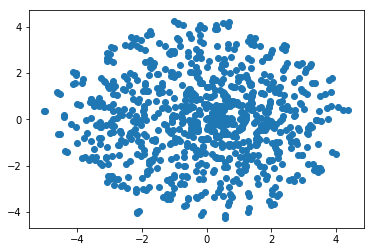

In [6]:
print(t_sne_result_gpu.shape)
plot_tsne(t_sne_result_gpu)

#### TSNE Sklearn

In [7]:
%%time
t_sne_result_sklearn = tsne_bhcuda.t_sne(samples=data_for_tsne, use_scikit=True, files_dir=files_dir,
                        no_dims=2, perplexity=perplexity, eta=learning_rate, theta=theta,
                        iterations=iterations, gpu_mem=gpu_mem, randseed=-1, verbose=2)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.015s...
[t-SNE] Computed neighbors for 1000 samples in 1.643s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.285718
[t-SNE] Computed conditional probabilities in 0.226s
[t-SNE] Iteration 50: error = 23.3307991, gradient norm = 0.0601652 (50 iterations in 0.916s)
[t-SNE] Iteration 100: error = 23.3804913, gradient norm = 0.0404596 (50 iterations in 0.935s)
[t-SNE] Iteration 150: error = 23.4897747, gradient norm = 0.0635168 (50 iterations in 0.971s)
[t-SNE] Iteration 200: error = 23.1315193, gradient norm = 0.0760415 (50 iterations in 0.957s)
[t-SNE] Iteration 250: error = 23.8753319, gradient norm = 0.0530310 (50 iterations in 1.077s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 23.875332
[t-SNE] Iteration 300: error = 3.1502802, gradient norm = 0.0026996 (50 iterations in 0.748s)
[t-SNE] Iteration 350: error = 2.9944384, gradient norm = 0.00067

(1000, 2)


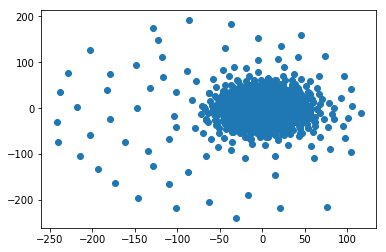

In [8]:
print(t_sne_result_sklearn.shape)
plot_tsne(t_sne_result_sklearn)